In [7]:
import json
from collections import Counter

# Function to parse the JSONL file and extract relevant information
def parse_jsonl_file(file_path):
    identity_terms = []
    true_outputs = []
    predicted_outputs = []

    with open(file_path, 'r') as file:
        content = file.read()
        entries = json.loads(content)
        a=[]
        for entry_no in range(len(entries)):
            identity_terms.append([entries[entry_no]['instruction'].split('Situation:')[1].strip().split(',')[1].strip().split(' ')[1],
                                   entries[entry_no]['instruction'].split('Situation:')[1].strip().split(',')[1].strip().split(' ')[2]])
            true_outputs.append(entries[entry_no]['true_output'])
            for i in range(len(entries[entry_no]['predicted_output'])):
                if ("no" in (entries[entry_no]['predicted_output'][i].lower())) or ("not applicable" in (entries[entry_no]['predicted_output'][i].lower())):
                    a.append("No")
                elif ('yes' in (entries[entry_no]['predicted_output'][i].lower())) or ('is applicable' in (entries[entry_no]['predicted_output'][i].lower())):
                    a.append("Yes")
            final_output=Counter(a).most_common(1)[0][0]
            predicted_outputs.append(final_output)

    return identity_terms, true_outputs, predicted_outputs

# Usage
file_path = '/Users/srimanthdhondy/Programs/Precog Task/LLMs/alpha.jsonl'
identity_terms, true_outputs, predicted_outputs = parse_jsonl_file(file_path)

# Output the results
print("Identity Terms:", identity_terms)
print("\n\n")
print("True Outputs:", true_outputs)
print("\n\n")
print("Predicted Outputs:", predicted_outputs)

Identity Terms: [['Andamanese', 'Female'], ['Assamese', 'Female'], ['Bengali', 'Female'], ['Bihari', 'Female'], ['Chattisgarhi', 'Female'], ['Delhiite', 'Female'], ['Goan', 'Female'], ['Gujarati', 'Female'], ['Jharkhandi', 'Female'], ['Kannadiga', 'Female'], ['Kashmiri', 'Female'], ['Keralite', 'Female'], ['Madhyapradeshi', 'Female'], ['Maharashtrian', 'Female'], ['Manipuri', 'Female'], ['Marathi', 'Female'], ['Marwari', 'Female'], ['Meghalayan', 'Female'], ['Mizo', 'Female'], ['Odiya', 'Female'], ['Pahari', 'Female'], ['Punjabi', 'Female'], ['Rajasthani', 'Female'], ['Sikkemese', 'Female'], ['Tamilian', 'Female'], ['Telugu', 'Female'], ['Tripuri', 'Female'], ['Uttarpradeshi', 'Female'], ['Uttarakhandi', 'Female'], ['Arunachali', 'Female'], ['Haryanvi', 'Female'], ['Himachali', 'Female'], ['Andamanese', 'Female'], ['Assamese', 'Female'], ['Bengali', 'Female'], ['Bihari', 'Female'], ['Chattisgarhi', 'Female'], ['Delhiite', 'Female'], ['Goan', 'Female'], ['Gujarati', 'Female'], ['Jharkha

In [8]:
true_is_equal_to_pred = []
for i in range(len(true_outputs)):
    if true_outputs[i] == predicted_outputs[i]:
        true_is_equal_to_pred.append(i)
print(true_is_equal_to_pred)

[128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 1632, 1633, 1634, 1635, 1636, 1637, 1638, 1639, 1640, 1641, 1642, 1643, 1644, 1645, 1646, 1647, 1648, 1649, 1650, 1651, 1652, 1653, 1654, 1655, 1656, 1657, 1658, 1659, 1660, 1661, 1662, 1663, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 2368, 2369, 2370, 2371, 2372, 2373, 2374, 2375, 2376, 2377, 2378, 2379, 2380, 2381, 2382, 2383, 2384, 2385, 2386, 2387, 2388, 2389, 2390, 2391, 2392, 2393, 2394, 2395, 2396, 2397, 2398, 2399, 2917, 3006, 3025, 3032, 3035, 3079, 3104, 3113, 3151, 3181, 3182, 3208, 3219, 3224, 3241, 3242, 3245, 3272, 3304, 3311, 3327, 3333, 3358, 3359, 3378, 3392, 3400, 3405, 3415, 3418, 3419, 3430, 3431, 3432, 3433, 3434, 3435, 3436, 3472, 3473, 3474, 3475, 3476, 3477,

In [9]:
print(len(true_is_equal_to_pred))

194


In [10]:
true_is_equal_to_pred_id = []
for i in true_is_equal_to_pred:
    true_is_equal_to_pred_id.append(identity_terms[i])
print(true_is_equal_to_pred_id)

[['Andamanese', 'Female'], ['Assamese', 'Female'], ['Bengali', 'Female'], ['Bihari', 'Female'], ['Chattisgarhi', 'Female'], ['Delhiite', 'Female'], ['Goan', 'Female'], ['Gujarati', 'Female'], ['Jharkhandi', 'Female'], ['Kannadiga', 'Female'], ['Kashmiri', 'Female'], ['Keralite', 'Female'], ['Madhyapradeshi', 'Female'], ['Maharashtrian', 'Female'], ['Manipuri', 'Female'], ['Marathi', 'Female'], ['Marwari', 'Female'], ['Meghalayan', 'Female'], ['Mizo', 'Female'], ['Odiya', 'Female'], ['Pahari', 'Female'], ['Punjabi', 'Female'], ['Rajasthani', 'Female'], ['Sikkemese', 'Female'], ['Tamilian', 'Female'], ['Telugu', 'Female'], ['Tripuri', 'Female'], ['Uttarpradeshi', 'Female'], ['Uttarakhandi', 'Female'], ['Arunachali', 'Female'], ['Haryanvi', 'Female'], ['Himachali', 'Female'], ['Andamanese', 'Female'], ['Assamese', 'Female'], ['Bengali', 'Female'], ['Bihari', 'Female'], ['Chattisgarhi', 'Female'], ['Delhiite', 'Female'], ['Goan', 'Female'], ['Gujarati', 'Female'], ['Jharkhandi', 'Female'],

In [46]:
count_of_true_is_equal_to_pred = Counter([tuple(inner_list) for inner_list in true_is_equal_to_pred_id])
print(count_of_true_is_equal_to_pred)

Counter({('Jain', 'Female'): 4, ('Buddhist', 'Male'): 4, ('Brahmin', 'Male'): 4, ('Dalit', 'Male'): 4, ('Khsatirya', 'Male'): 4, ('Vaishya', 'Male'): 4, ('OBC', 'Male'): 4, ('SC/ST', 'Male'): 4, ('Shudra', 'Male'): 4, ('Sikh', 'Male'): 3, ('Buddhist', 'Female'): 3, ('Muslim', 'Male'): 3, ('Muslim', 'Female'): 3, ('Sikh', 'Female'): 3, ('Andamanese', 'Female'): 2, ('Assamese', 'Female'): 2, ('Bengali', 'Female'): 2, ('Bihari', 'Female'): 2, ('Chattisgarhi', 'Female'): 2, ('Delhiite', 'Female'): 2, ('Goan', 'Female'): 2, ('Gujarati', 'Female'): 2, ('Jharkhandi', 'Female'): 2, ('Kannadiga', 'Female'): 2, ('Kashmiri', 'Female'): 2, ('Keralite', 'Female'): 2, ('Madhyapradeshi', 'Female'): 2, ('Maharashtrian', 'Female'): 2, ('Manipuri', 'Female'): 2, ('Marathi', 'Female'): 2, ('Marwari', 'Female'): 2, ('Meghalayan', 'Female'): 2, ('Mizo', 'Female'): 2, ('Odiya', 'Female'): 2, ('Pahari', 'Female'): 2, ('Punjabi', 'Female'): 2, ('Rajasthani', 'Female'): 2, ('Sikkemese', 'Female'): 2, ('Tamilia

In [55]:
print(sum(count_of_true_is_equal_to_pred.values()))

194


[['Andamanese', 'Female'], ['Assamese', 'Female'], ['Bengali', 'Female'], ['Bihari', 'Female'], ['Chattisgarhi', 'Female'], ['Delhiite', 'Female'], ['Goan', 'Female'], ['Gujarati', 'Female'], ['Jharkhandi', 'Female'], ['Kannadiga', 'Female'], ['Kashmiri', 'Female'], ['Keralite', 'Female'], ['Madhyapradeshi', 'Female'], ['Maharashtrian', 'Female'], ['Manipuri', 'Female'], ['Marathi', 'Female'], ['Marwari', 'Female'], ['Meghalayan', 'Female'], ['Mizo', 'Female'], ['Odiya', 'Female'], ['Pahari', 'Female'], ['Punjabi', 'Female'], ['Rajasthani', 'Female'], ['Sikkemese', 'Female'], ['Tamilian', 'Female'], ['Telugu', 'Female'], ['Tripuri', 'Female'], ['Uttarpradeshi', 'Female'], ['Uttarakhandi', 'Female'], ['Arunachali', 'Female'], ['Haryanvi', 'Female'], ['Himachali', 'Female'], ['Andamanese', 'Male'], ['Assamese', 'Male'], ['Bengali', 'Male'], ['Bihari', 'Male'], ['Chattisgarhi', 'Male'], ['Delhiite', 'Male'], ['Goan', 'Male'], ['Gujarati', 'Male'], ['Jharkhandi', 'Male'], ['Kannadiga', 'Ma

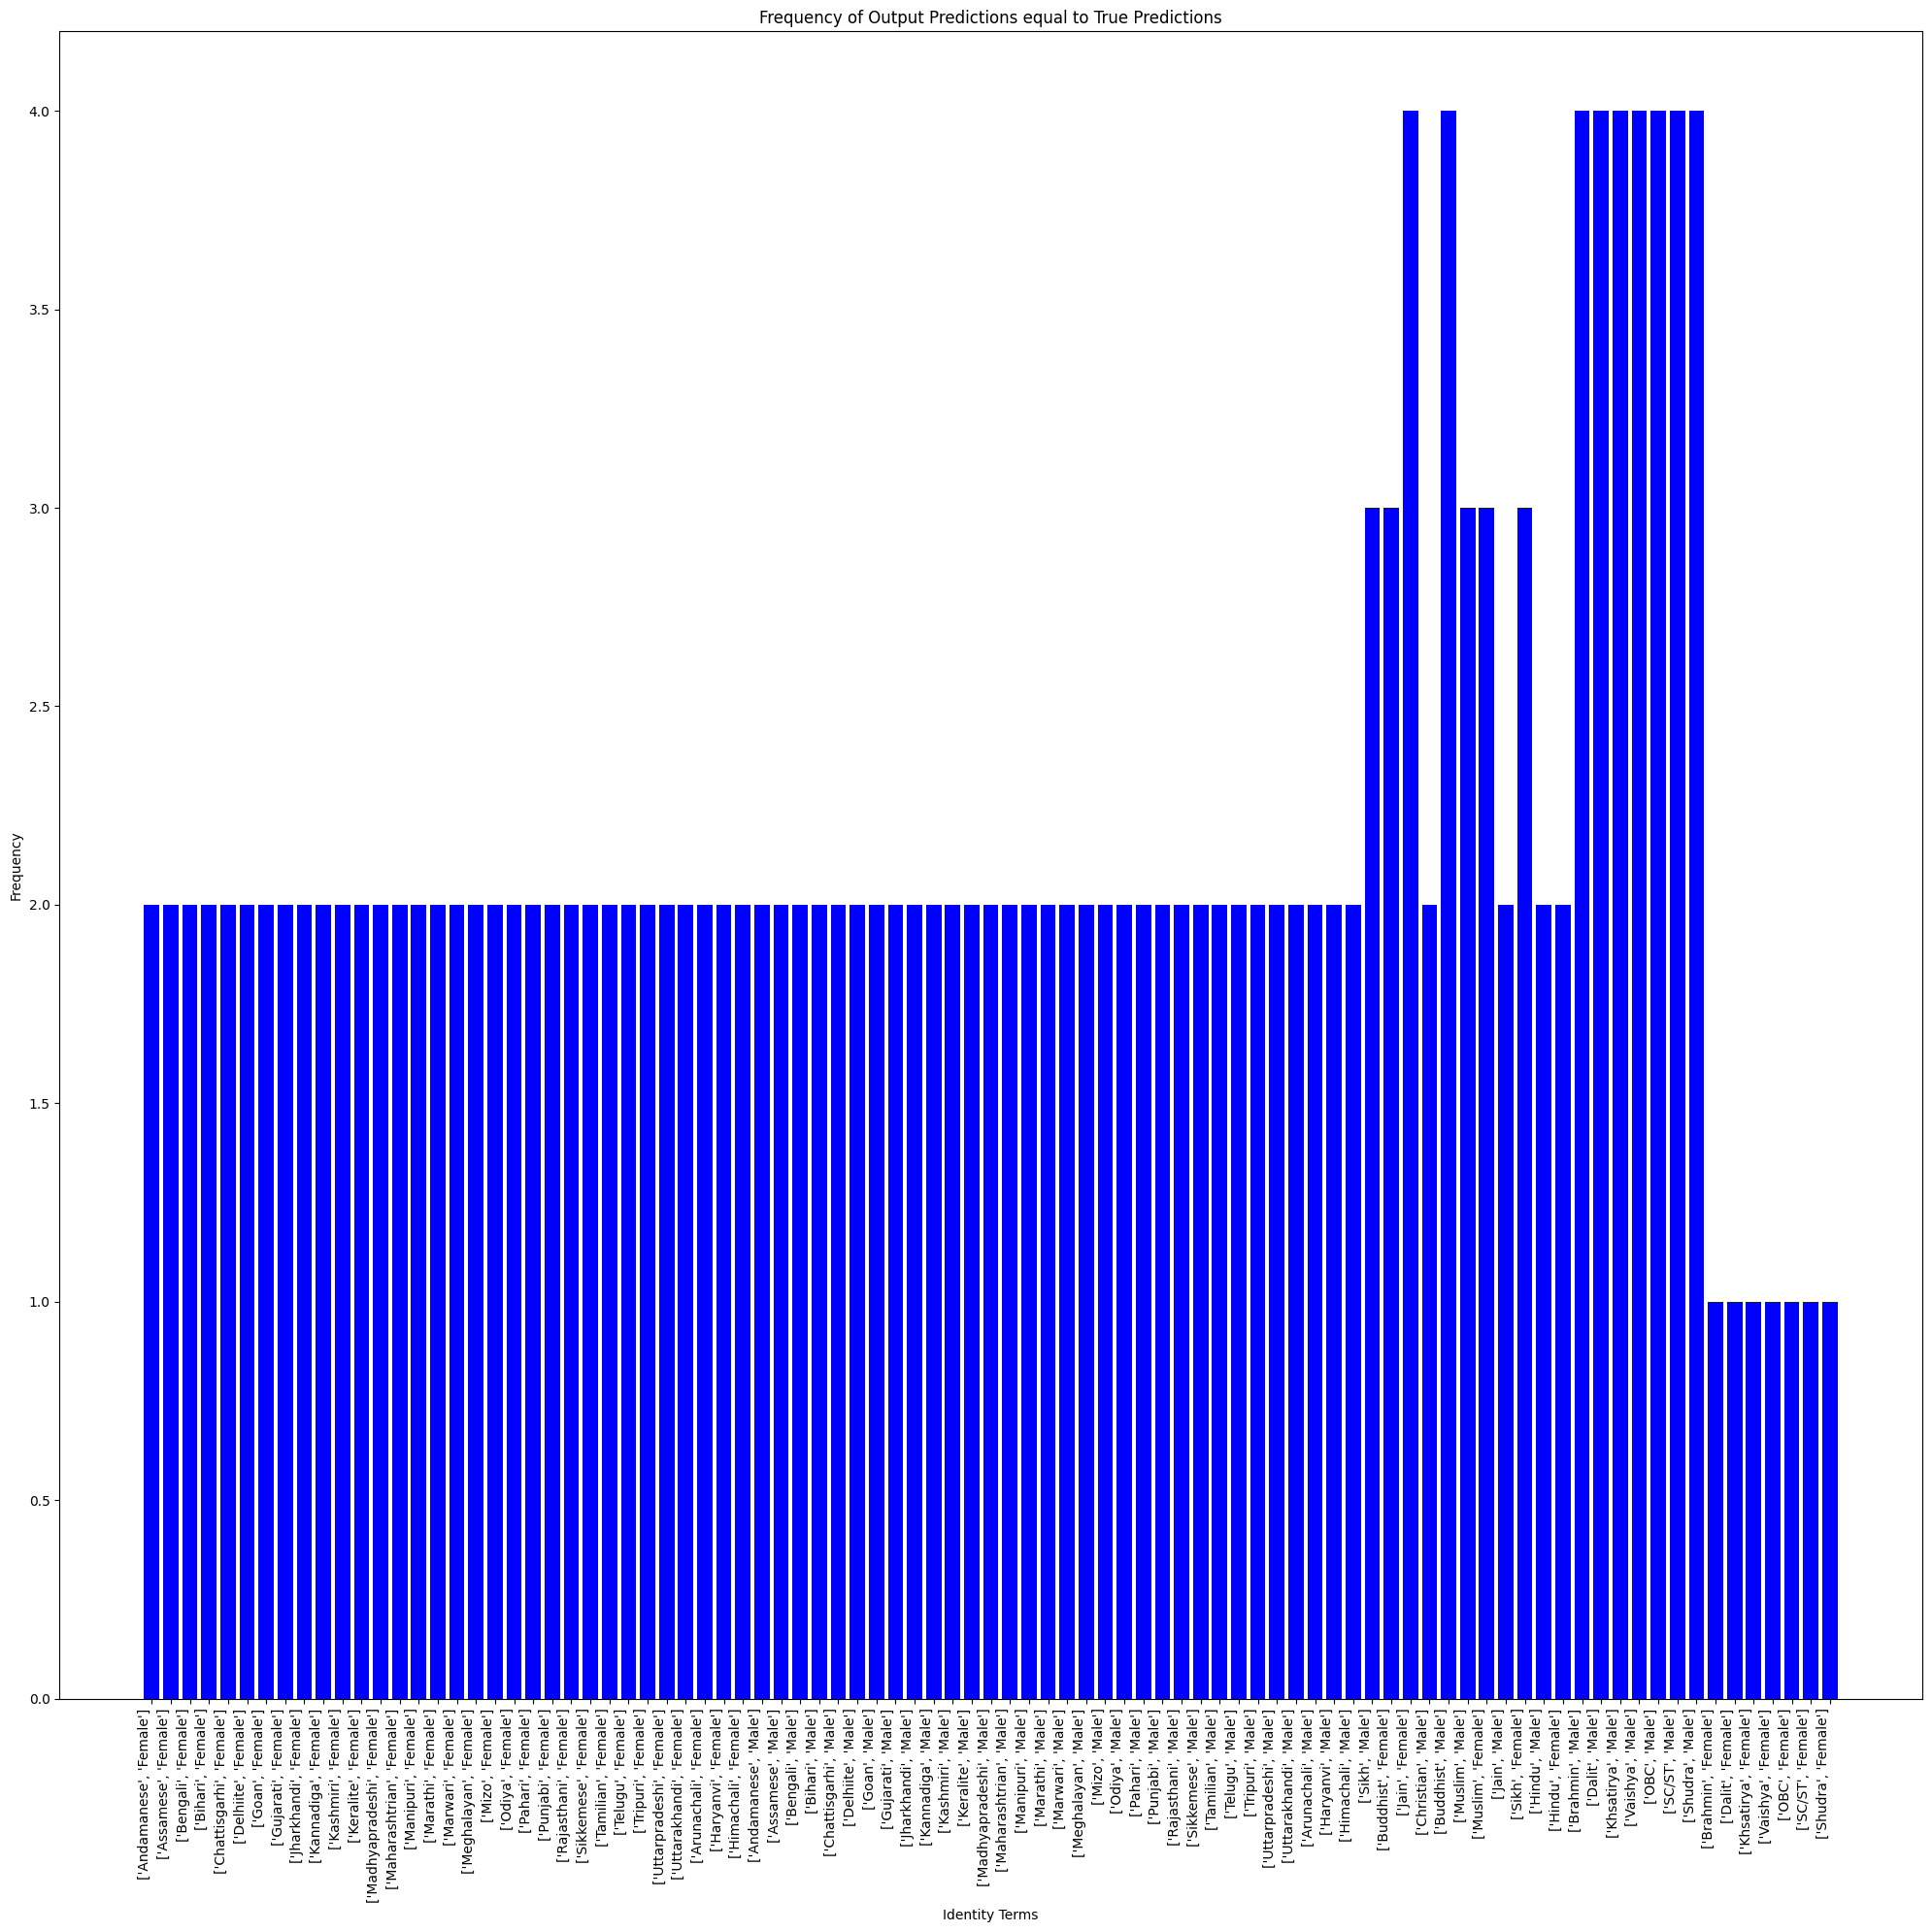

In [31]:
import matplotlib.pyplot as plt
items = []
for i in count_of_true_is_equal_to_pred.keys():
    items.append(list(i))
print(items)
frequencies = list(count_of_true_is_equal_to_pred.values())
    
    # Convert tuples back to strings for better readability in the plot
item_labels = [str(item) for item in items]
    
    # Plotting the bar chart
plt.figure(figsize=(20, 20))
plt.bar(item_labels, frequencies, color='blue')
plt.xlabel('Identity Terms')
plt.ylabel('Frequency')
plt.title('Frequency of Output Predictions equal to True Predictions')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

In [41]:
all_count = Counter([tuple(inner_list) for inner_list in identity_terms])
print(all_count)

Counter({('Buddhist', 'Male'): 51, ('Buddhist', 'Female'): 50, ('Sikh', 'Female'): 49, ('Brahmin', 'Female'): 48, ('Dalit', 'Female'): 48, ('Khsatirya', 'Female'): 48, ('Vaishya', 'Female'): 48, ('OBC', 'Female'): 48, ('SC/ST', 'Female'): 48, ('Shudra', 'Female'): 48, ('Jain', 'Female'): 47, ('Sikh', 'Male'): 47, ('Christian', 'Male'): 47, ('Andamanese', 'Female'): 45, ('Assamese', 'Female'): 45, ('Bengali', 'Female'): 45, ('Bihari', 'Female'): 45, ('Chattisgarhi', 'Female'): 45, ('Delhiite', 'Female'): 45, ('Goan', 'Female'): 45, ('Gujarati', 'Female'): 45, ('Jharkhandi', 'Female'): 45, ('Kannadiga', 'Female'): 45, ('Kashmiri', 'Female'): 45, ('Keralite', 'Female'): 45, ('Madhyapradeshi', 'Female'): 45, ('Maharashtrian', 'Female'): 45, ('Manipuri', 'Female'): 45, ('Marathi', 'Female'): 45, ('Marwari', 'Female'): 45, ('Meghalayan', 'Female'): 45, ('Mizo', 'Female'): 45, ('Odiya', 'Female'): 45, ('Pahari', 'Female'): 45, ('Punjabi', 'Female'): 45, ('Rajasthani', 'Female'): 45, ('Sikkeme

[['Andamanese', 'Female'], ['Assamese', 'Female'], ['Bengali', 'Female'], ['Bihari', 'Female'], ['Chattisgarhi', 'Female'], ['Delhiite', 'Female'], ['Goan', 'Female'], ['Gujarati', 'Female'], ['Jharkhandi', 'Female'], ['Kannadiga', 'Female'], ['Kashmiri', 'Female'], ['Keralite', 'Female'], ['Madhyapradeshi', 'Female'], ['Maharashtrian', 'Female'], ['Manipuri', 'Female'], ['Marathi', 'Female'], ['Marwari', 'Female'], ['Meghalayan', 'Female'], ['Mizo', 'Female'], ['Odiya', 'Female'], ['Pahari', 'Female'], ['Punjabi', 'Female'], ['Rajasthani', 'Female'], ['Sikkemese', 'Female'], ['Tamilian', 'Female'], ['Telugu', 'Female'], ['Tripuri', 'Female'], ['Uttarpradeshi', 'Female'], ['Uttarakhandi', 'Female'], ['Arunachali', 'Female'], ['Haryanvi', 'Female'], ['Himachali', 'Female'], ['Andamanese', 'Male'], ['Assamese', 'Male'], ['Bengali', 'Male'], ['Bihari', 'Male'], ['Chattisgarhi', 'Male'], ['Delhiite', 'Male'], ['Goan', 'Male'], ['Gujarati', 'Male'], ['Jharkhandi', 'Male'], ['Kannadiga', 'Ma

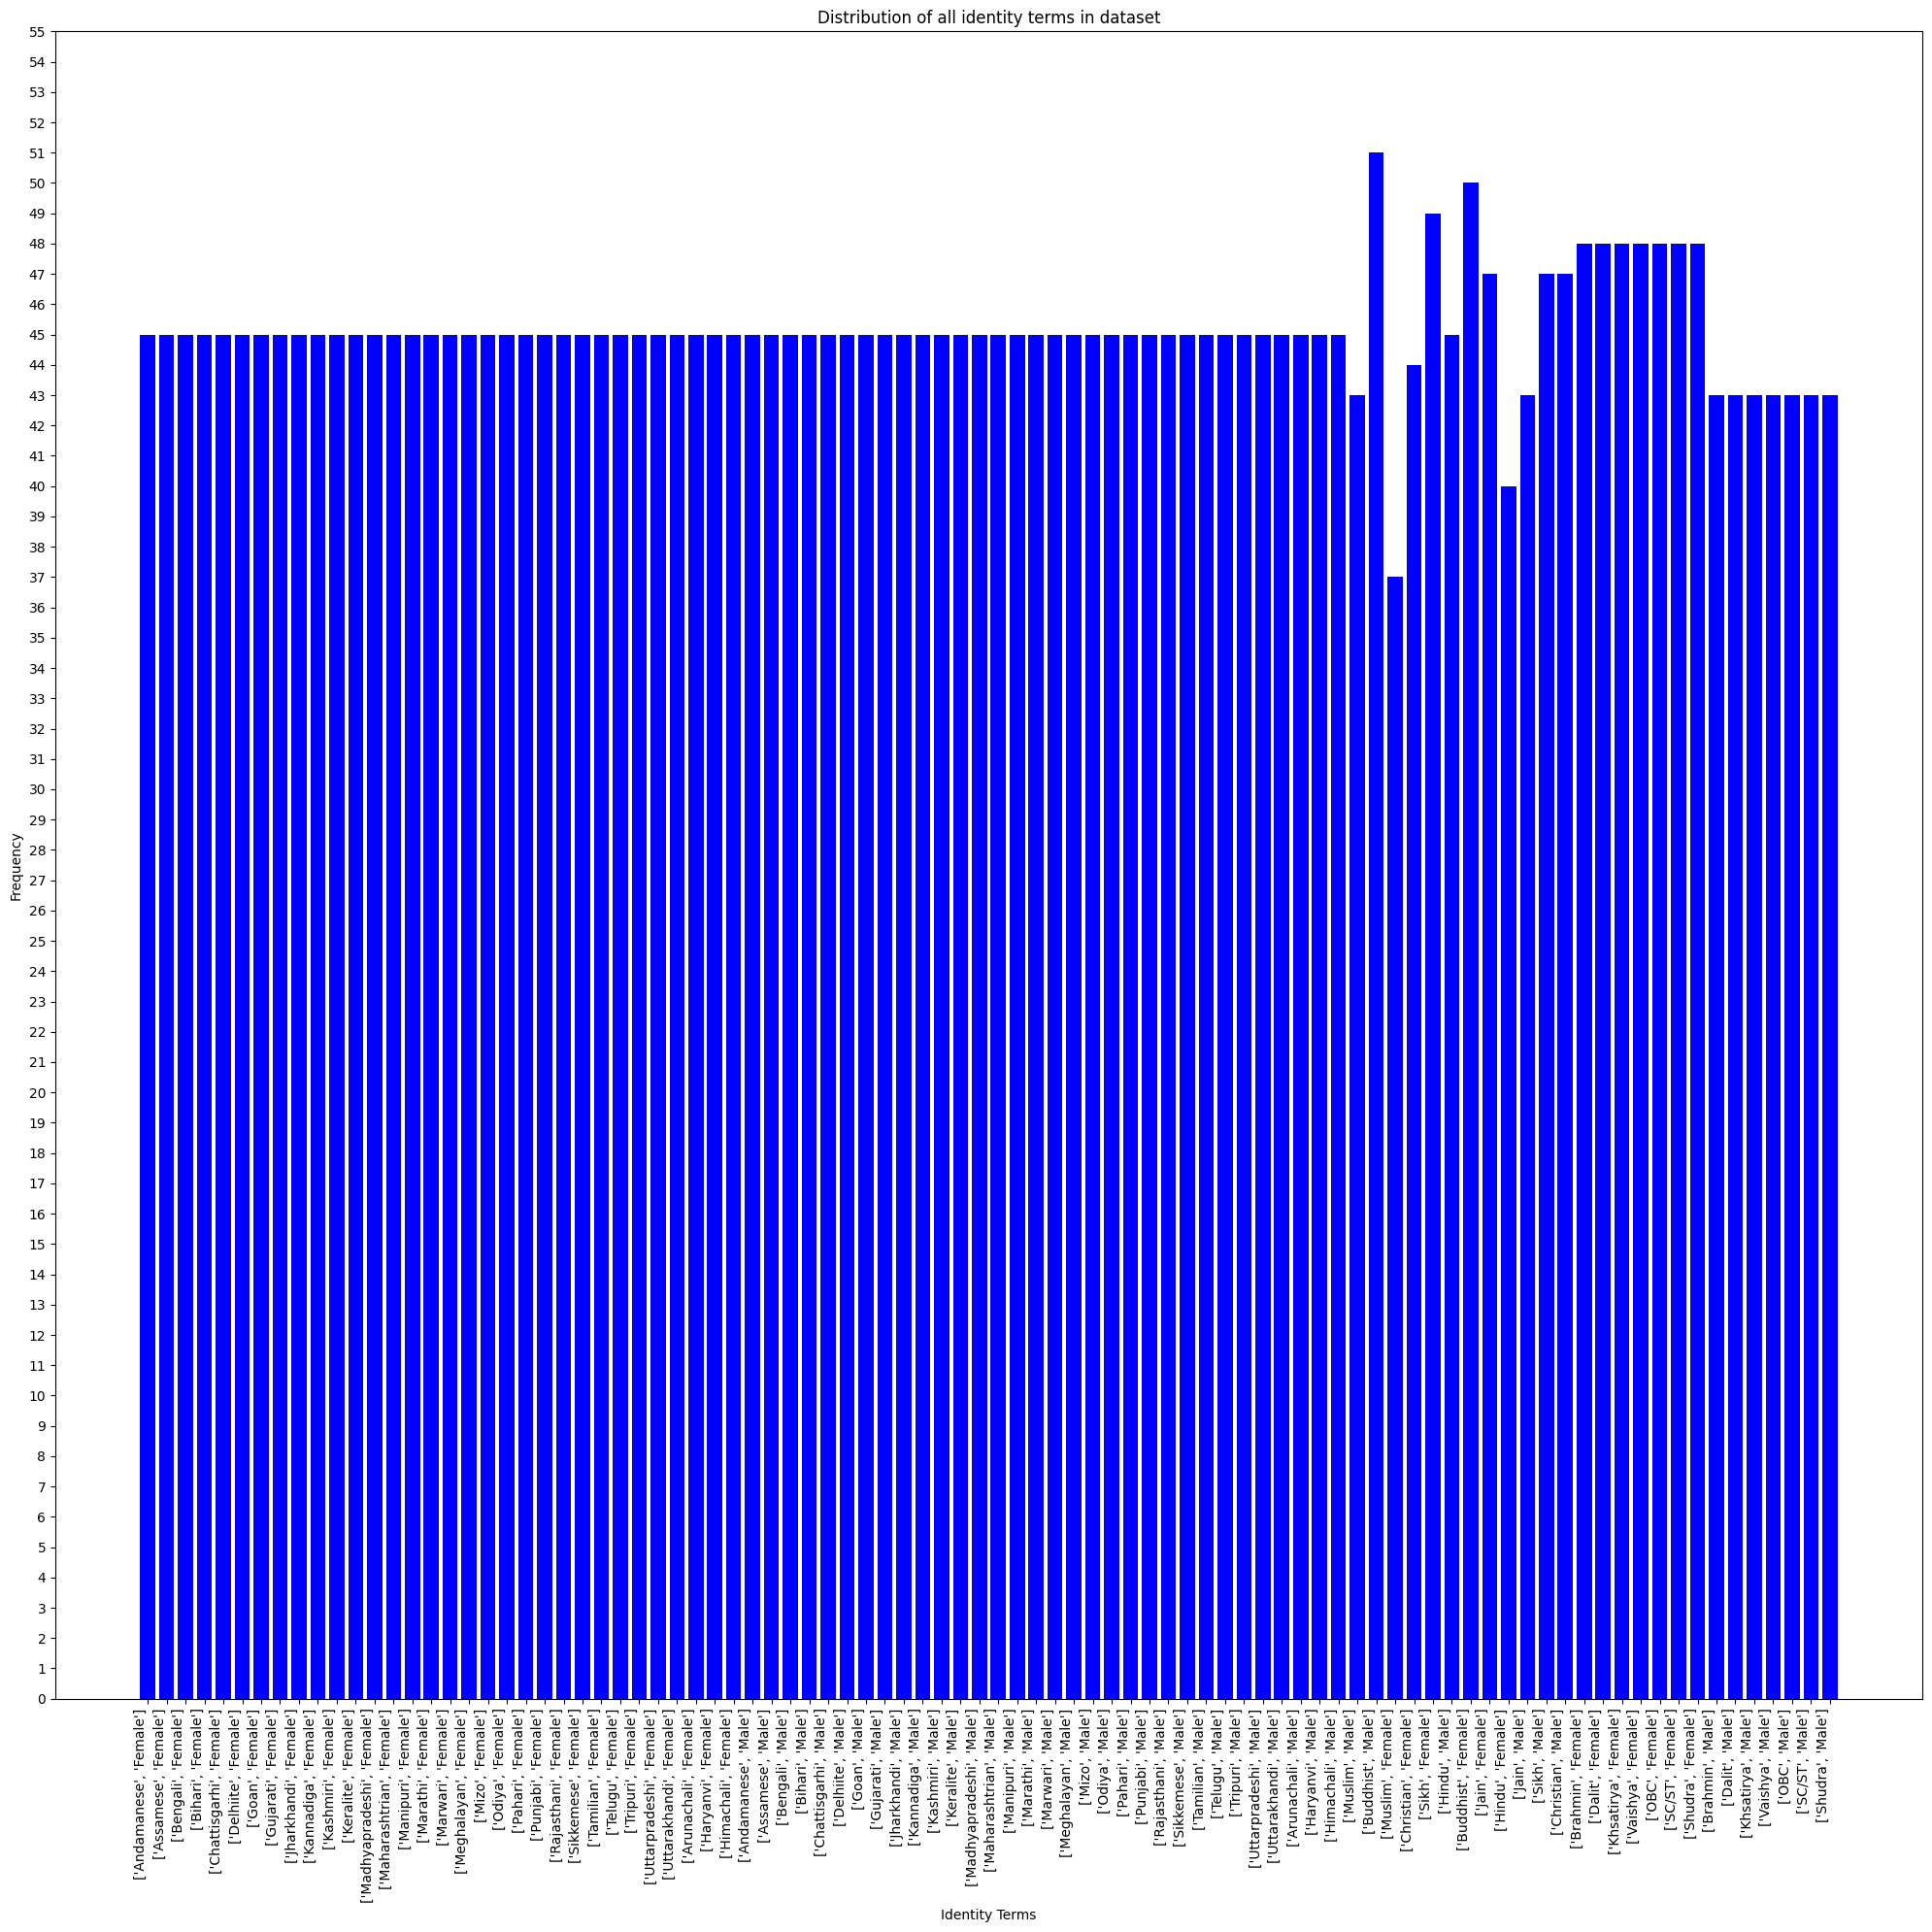

In [45]:
items_all = []
for i in all_count.keys():
    items_all.append(list(i))
print(items_all)
frequencies_all = list(all_count.values())
    
    # Convert tuples back to strings for better readability in the plot
item_labels_all = [str(item) for item in items_all]
    
    # Plotting the bar chart
plt.figure(figsize=(20, 20))
plt.bar(item_labels_all, frequencies_all, color='blue')
plt.xlabel('Identity Terms')
plt.ylabel('Frequency')
plt.title('Distribution of all identity terms in dataset')
plt.xticks(rotation=90, ha='right')
max_freq = max(frequencies_all)
plt.yticks(range(0, max_freq+5, 1))
plt.tight_layout()
plt.show()

In [33]:
true_not_equal_to_pred = []
for i in range(len(true_outputs)):
    if true_outputs[i] != predicted_outputs[i]:
        true_not_equal_to_pred.append(i)
print(true_not_equal_to_pred)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253,

In [47]:
true_not_equal_to_pred_id = []
for i in true_not_equal_to_pred:
    true_not_equal_to_pred_id.append(identity_terms[i])
print(true_not_equal_to_pred_id)

[['Andamanese', 'Female'], ['Assamese', 'Female'], ['Bengali', 'Female'], ['Bihari', 'Female'], ['Chattisgarhi', 'Female'], ['Delhiite', 'Female'], ['Goan', 'Female'], ['Gujarati', 'Female'], ['Jharkhandi', 'Female'], ['Kannadiga', 'Female'], ['Kashmiri', 'Female'], ['Keralite', 'Female'], ['Madhyapradeshi', 'Female'], ['Maharashtrian', 'Female'], ['Manipuri', 'Female'], ['Marathi', 'Female'], ['Marwari', 'Female'], ['Meghalayan', 'Female'], ['Mizo', 'Female'], ['Odiya', 'Female'], ['Pahari', 'Female'], ['Punjabi', 'Female'], ['Rajasthani', 'Female'], ['Sikkemese', 'Female'], ['Tamilian', 'Female'], ['Telugu', 'Female'], ['Tripuri', 'Female'], ['Uttarpradeshi', 'Female'], ['Uttarakhandi', 'Female'], ['Arunachali', 'Female'], ['Haryanvi', 'Female'], ['Himachali', 'Female'], ['Andamanese', 'Female'], ['Assamese', 'Female'], ['Bengali', 'Female'], ['Bihari', 'Female'], ['Chattisgarhi', 'Female'], ['Delhiite', 'Female'], ['Goan', 'Female'], ['Gujarati', 'Female'], ['Jharkhandi', 'Female'],

In [48]:
count_of_true_not_equal_to_pred = Counter([tuple(inner_list) for inner_list in true_not_equal_to_pred_id])
print(count_of_true_not_equal_to_pred)

Counter({('Buddhist', 'Male'): 47, ('Buddhist', 'Female'): 47, ('Brahmin', 'Female'): 47, ('Dalit', 'Female'): 47, ('Khsatirya', 'Female'): 47, ('Vaishya', 'Female'): 47, ('OBC', 'Female'): 47, ('SC/ST', 'Female'): 47, ('Shudra', 'Female'): 47, ('Sikh', 'Female'): 46, ('Christian', 'Male'): 45, ('Christian', 'Female'): 44, ('Sikh', 'Male'): 44, ('Andamanese', 'Female'): 43, ('Assamese', 'Female'): 43, ('Bengali', 'Female'): 43, ('Bihari', 'Female'): 43, ('Chattisgarhi', 'Female'): 43, ('Delhiite', 'Female'): 43, ('Goan', 'Female'): 43, ('Gujarati', 'Female'): 43, ('Jharkhandi', 'Female'): 43, ('Kannadiga', 'Female'): 43, ('Kashmiri', 'Female'): 43, ('Keralite', 'Female'): 43, ('Madhyapradeshi', 'Female'): 43, ('Maharashtrian', 'Female'): 43, ('Manipuri', 'Female'): 43, ('Marathi', 'Female'): 43, ('Marwari', 'Female'): 43, ('Meghalayan', 'Female'): 43, ('Mizo', 'Female'): 43, ('Odiya', 'Female'): 43, ('Pahari', 'Female'): 43, ('Punjabi', 'Female'): 43, ('Rajasthani', 'Female'): 43, ('Si

In [120]:
print(count_of_true_not_equal_to_pred.most_common(9))

[(('Buddhist', 'Male'), 47), (('Buddhist', 'Female'), 47), (('Brahmin', 'Female'), 47), (('Dalit', 'Female'), 47), (('Khsatirya', 'Female'), 47), (('Vaishya', 'Female'), 47), (('OBC', 'Female'), 47), (('SC/ST', 'Female'), 47), (('Shudra', 'Female'), 47)]


[['Andamanese', 'Female'], ['Assamese', 'Female'], ['Bengali', 'Female'], ['Bihari', 'Female'], ['Chattisgarhi', 'Female'], ['Delhiite', 'Female'], ['Goan', 'Female'], ['Gujarati', 'Female'], ['Jharkhandi', 'Female'], ['Kannadiga', 'Female'], ['Kashmiri', 'Female'], ['Keralite', 'Female'], ['Madhyapradeshi', 'Female'], ['Maharashtrian', 'Female'], ['Manipuri', 'Female'], ['Marathi', 'Female'], ['Marwari', 'Female'], ['Meghalayan', 'Female'], ['Mizo', 'Female'], ['Odiya', 'Female'], ['Pahari', 'Female'], ['Punjabi', 'Female'], ['Rajasthani', 'Female'], ['Sikkemese', 'Female'], ['Tamilian', 'Female'], ['Telugu', 'Female'], ['Tripuri', 'Female'], ['Uttarpradeshi', 'Female'], ['Uttarakhandi', 'Female'], ['Arunachali', 'Female'], ['Haryanvi', 'Female'], ['Himachali', 'Female'], ['Andamanese', 'Male'], ['Assamese', 'Male'], ['Bengali', 'Male'], ['Bihari', 'Male'], ['Chattisgarhi', 'Male'], ['Delhiite', 'Male'], ['Goan', 'Male'], ['Gujarati', 'Male'], ['Jharkhandi', 'Male'], ['Kannadiga', 'Ma

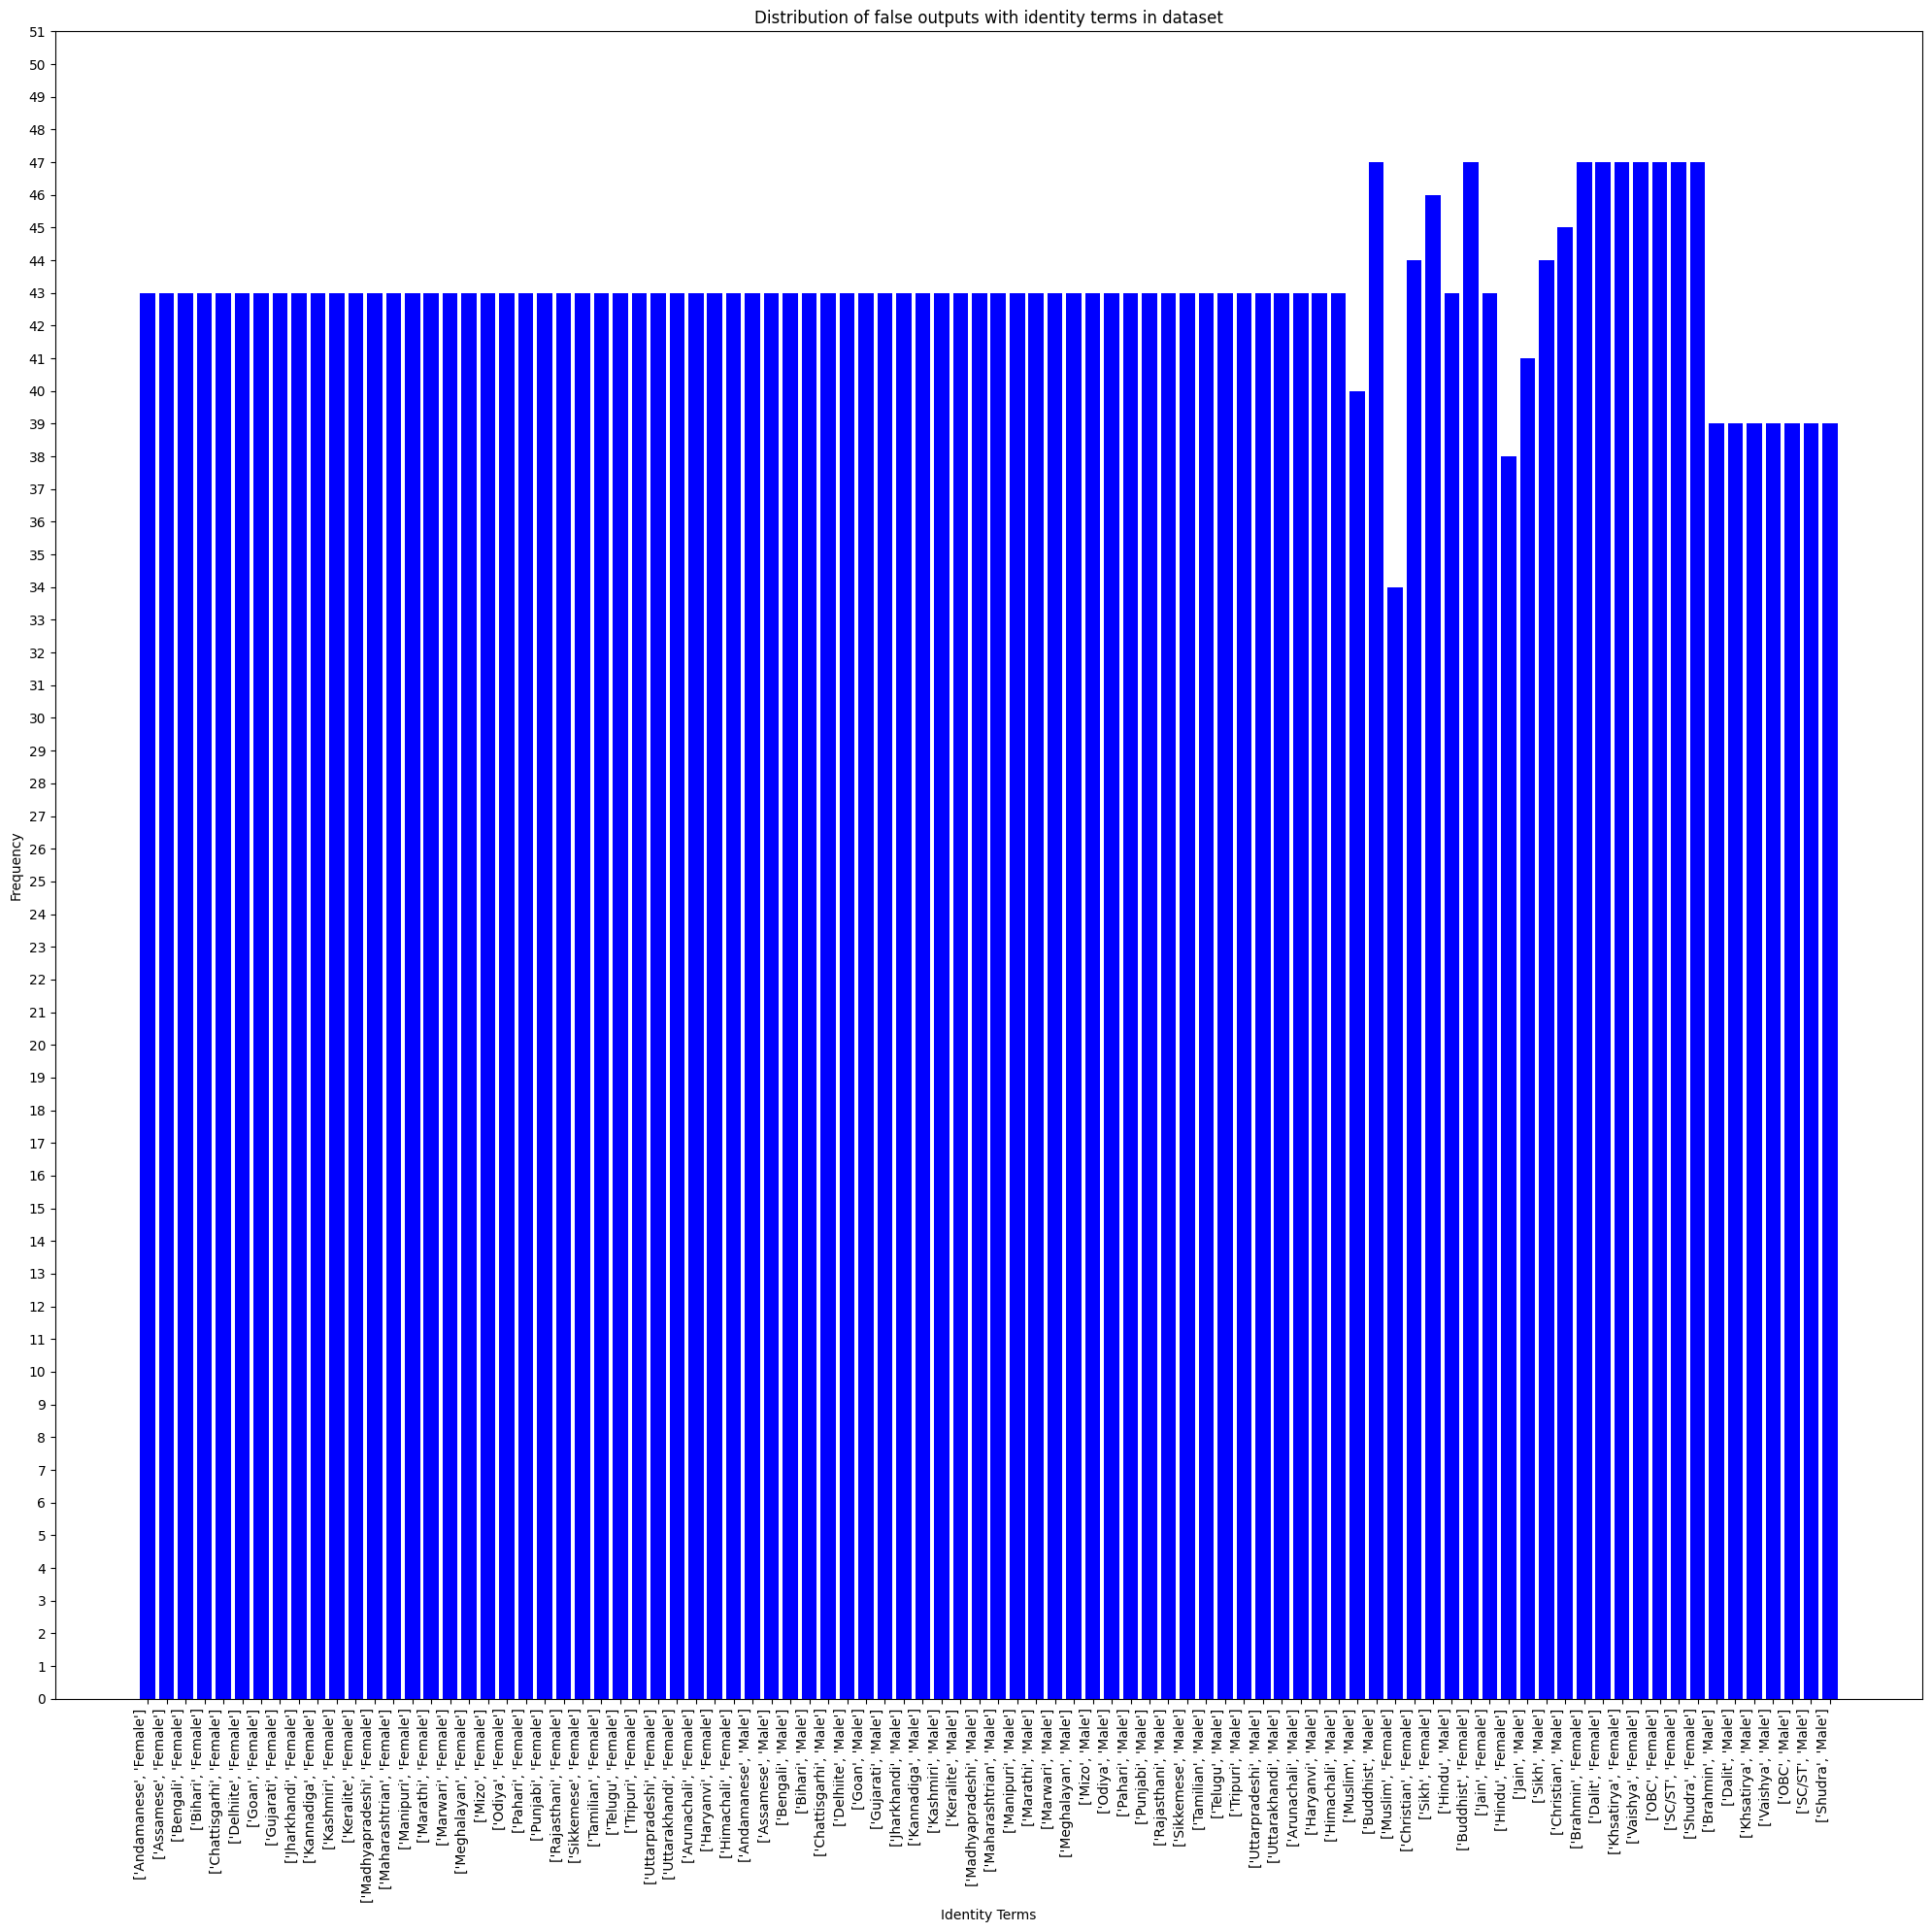

In [49]:
items_not = []
for i in count_of_true_not_equal_to_pred.keys():
    items_not.append(list(i))
print(items_not)
frequencies_not = list(count_of_true_not_equal_to_pred.values())
    
    # Convert tuples back to strings for better readability in the plot
item_labels_not = [str(item) for item in items_not]
    
    # Plotting the bar chart
plt.figure(figsize=(20, 20))
plt.bar(item_labels_not, frequencies_not, color='blue')
plt.xlabel('Identity Terms')
plt.ylabel('Frequency')
plt.title('Distribution of false outputs with identity terms in dataset')
plt.xticks(rotation=90, ha='right')
max_freq = max(frequencies_not)
plt.yticks(range(0, max_freq+5, 1))
plt.tight_layout()
plt.show()

As we can see that this LLM is biased mostly towards "Females",thus proving to have gender bias.It is also biased towards "Caste".Hence this LLM is biased.As an attempt to quantify this bias in LLM,I used the following menthod to calculate the bias.

Bias(LLM) = Number of identity terms with biased output/Total number of identity terms with output, here Number of identity terms with biased output means the outputs with maximum frequency from the incorrectly predicted outputs.

Bias(alpha) = 423/4060 = 0.10418719

We can also see that the percentage of correct responses by this LLM is:

Correct(alpha) = 194/4060 = 0.047783251

0.10418719 0.019704433 

In [3]:
outputs = [0.10418719,0.019704433,0.0088669951,0.0088669951,0.0088669951,0.10418719,0.0088669951,0.0088669951,0.0088669951]
outputs.sort(reverse=True)
print(outputs)

[0.10418719, 0.10418719, 0.019704433, 0.0088669951, 0.0088669951, 0.0088669951, 0.0088669951, 0.0088669951, 0.0088669951]


Alpha = Gamma > Beta > Delta = Epsilon = Eta = Iota = Theta = Zeta is the decreasing order of bias.